<a href="https://colab.research.google.com/github/Himika-Mishra/Dissertation/blob/main/Mnist%20Type_2_(Case_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Type 2 (Case 3)

In [2]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from skimage.util import random_noise
from tqdm import tqdm
import random
from sklearn.preprocessing import OneHotEncoder
import scipy.sparse as sp
from sklearn.metrics import f1_score

In [3]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Filter images and labels for digits 0 to 6
mask_train = np.isin(y_train, [0, 1, 2, 3, 4, 5, 6])
X_train = X_train[mask_train]
y_train = y_train[mask_train]

# Reshape the images to 784-dimensional vectors
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255

# Create separate instances of OneHotEncoder for training and testing sets
encoder_train = OneHotEncoder(categories=[range(10)])
encoder_test = OneHotEncoder(categories=[range(10)])

# Fit the encoders on the respective datasets
encoder_train.fit(y_train.reshape((-1, 1)))
encoder_test.fit(y_test.reshape((-1, 1)))

# Transform the labels in the training set
y_train_encoded = encoder_train.transform(y_train.reshape((-1, 1))).toarray()

# Transform the labels in the testing set
y_test_encoded = encoder_test.transform(y_test.reshape((-1, 1))).toarray()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Define the ratio of distorted images to select
ratios = np.arange(0.1, 1.1, 0.1)

In [5]:
# Convert the distorted train data from list and ndarray to DataFrame
x_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train_encoded)

In [6]:
# Create a DataFrame with uniform distributed noise
np.random.seed(42)

# Initialize lists to store the ratio and F1 scores
ratios = []
f1_scores = []
classification_reports = []

# Define the range for reducing the training set
start_ratio = 0.1
end_ratio = 1.1
increment = 0.1

# Train and evaluate the model 
# Fit a regular MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train, y_train)
# Accuracy Score
test_acc = mlp.score(x_train, y_train)
# print(mlp.score(x_train, y_train))
print(f"Test accuracy with original data(0-9) with original_ratio= 0.0: {test_acc}")

# predictions
pred = mlp.predict(X_test)
print(confusion_matrix(y_test_encoded.argmax(axis=1), pred.argmax(axis=1)))
print(classification_report(y_test_encoded.argmax(axis=1), pred.argmax(axis=1)))

# Calculate F1 score and store the ratio, F1 score, and classification report
f1 = f1_score(y_test_encoded.argmax(axis=1), pred.argmax(axis=1), average='weighted')
ratios.append(0.0)
f1_scores.append(f1)
classification_reports.append(classification_report(y_test_encoded.argmax(axis=1), pred.argmax(axis=1), output_dict=True))

# Iterate over the ratios
for ratio in np.arange(start_ratio, end_ratio, increment):
    # Calculate the number of distorted images to select based on the ratio
    num_distorted = int(len(x_train) * ratio)

    # # Randomly select the specified number of distorted images
    # selected_distorted_images = x_train_distorted.sample(n=num_distorted, random_state=42)
    # selected_distorted_labels = y_train_distorted.sample(n=num_distorted, random_state=42)

    # Select random indices to reduce
    reduce_indices = np.random.choice(len(x_train), num_distorted, replace=False)
    
    # Reduce the training set
    x_train_reduced = x_train[np.logical_not(np.isin(np.arange(len(x_train)), reduce_indices))]
    y_train_reduced = y_train[np.logical_not(np.isin(np.arange(len(y_train)), reduce_indices))]

    # Create a noise DataFrame with the same number of rows as reduced training set
    noise_data = pd.DataFrame(np.random.uniform(size=(num_distorted, 784)))
    noise_labels = np.zeros((num_distorted, 10))

    # Concatenate the selected distorted images with the original train dataframe
    merged_x_train = np.concatenate([x_train_reduced, noise_data.values])
    merged_y_train = np.concatenate([y_train_reduced, noise_labels])

    # Train and evaluate the model 
    # Fit a regular MLP classifier
    mlp = MLPClassifier(hidden_layer_sizes=(10,8), activation='relu', solver='adam', max_iter=500)
    mlp.fit(merged_x_train, merged_y_train)
    # Accuracy Score
    test_acc = mlp.score(merged_x_train, merged_y_train)
    # print(mlp.score(merged_x_train, merged_y_train))
    print(f"Test accuracy with train data(0-6) and test data(0-9) with adding noise with original_ratio={ratio}: {test_acc}")

    # predictions
    pred = mlp.predict(X_test)
    print(confusion_matrix(y_test_encoded.argmax(axis=1), pred.argmax(axis=1)))
    print(classification_report(y_test_encoded.argmax(axis=1), pred.argmax(axis=1)))

    # Calculate F1 score and store the ratio, F1 score, and classification report
    f1 = f1_score(y_test_encoded.argmax(axis=1), pred.argmax(axis=1), average='weighted')
    ratios.append(ratio)
    f1_scores.append(f1)
    classification_reports.append(classification_report(y_test_encoded.argmax(axis=1), pred.argmax(axis=1), output_dict=True))
    print("--------------------------------------------------")

Test accuracy with original data(0-9) with original_ratio= 0.0: 0.9879098604983904
[[ 962    0    8    1    1    4    4    0    0    0]
 [   5 1118    6    2    1    1    2    0    0    0]
 [  16    6  966   36    6    0    2    0    0    0]
 [  17    4   18  955    0   15    1    0    0    0]
 [  17    0    3    7  944    3    8    0    0    0]
 [  43    1    3   30   13  794    8    0    0    0]
 [  29    2    6    0    8   11  902    0    0    0]
 [ 211   33  158  411  145   70    0    0    0    0]
 [ 197   90   90  384   35  152   26    0    0    0]
 [ 154   15   23  149  554  113    1    0    0    0]]
              precision    recall  f1-score   support

           0       0.58      0.98      0.73       980
           1       0.88      0.99      0.93      1135
           2       0.75      0.94      0.84      1032
           3       0.48      0.95      0.64      1010
           4       0.55      0.96      0.70       982
           5       0.68      0.89      0.77       892
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Test accuracy with train data(0-6) and test data(0-9) with adding noise with original_ratio=0.1: 0.9906998926910695
[[ 965    0    3    1    3    4    4    0    0    0]
 [   5 1117    4    4    0    2    3    0    0    0]
 [  24    7  949   26    8    6   12    0    0    0]
 [  12    2   14  950    5   23    4    0    0    0]
 [   7    2   15    3  940    4   11    0    0    0]
 [  15    3    2   25    8  827   12    0    0    0]
 [  28    3    5    2    6   14  900    0    0    0]
 [ 113   25  139  413  162  175    1    0    0    0]
 [ 128   55  116  431   71  139   34    0    0    0]
 [  74   17   22  106  694   93    3    0    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.70      0.98      0.82       980
           1       0.91      0.98      0.94      1135
           2       0.75      0.92      0.82      1032
           3       0.48      0.94      0.64      1010
           4       0.50      0.96      0.65       982
           5       0.64      0.93      0.76       892
           6       0.91      0.94      0.93       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.66     10000
   macro avg       0.49      0.67      0.56     10000
weighted avg       0.49      0.66      0.56     10000

--------------------------------------------------
Test accuracy with train data(0-6) and test data(0-9) with adding noise with original_ratio=0.2: 0.9932753070227733
[[ 967    0    1    3    3    4    2    0    0    0]
 [  14 1110    4    1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.62      0.99      0.76       980
           1       0.87      0.98      0.92      1135
           2       0.75      0.91      0.82      1032
           3       0.50      0.93      0.65      1010
           4       0.52      0.97      0.68       982
           5       0.66      0.93      0.77       892
           6       0.94      0.93      0.93       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.66     10000
   macro avg       0.49      0.66      0.55     10000
weighted avg       0.49      0.66      0.56     10000

--------------------------------------------------
Test accuracy with train data(0-6) and test data(0-9) with adding noise with original_ratio=0.30000000000000004: 0.9978061285322523
[[ 969    0    1    2    0    3    5    0    0    0]
 [   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Test accuracy with train data(0-6) and test data(0-9) with adding noise with original_ratio=0.4: 0.9919399069989269
[[ 962    0    2    3    2   10    1    0    0    0]
 [   6 1116    6    1    0    3    3    0    0    0]
 [  47   15  934   19    7    6    4    0    0    0]
 [  28    4   15  944    1   16    2    0    0    0]
 [  31    6    4    7  923    7    4    0    0    0]
 [  33   10    6   31    8  795    9    0    0    0]
 [  43    4    5    1    9   30  866    0    0    0]
 [ 199   50  102  441   73  162    1    0    0    0]
 [ 284   46   82  272   64  210   16    0    0    0]
 [ 152   18    8  119  634   74    4    0    0    0]]
              precision    recall  f1-score   support

           0       0.54      0.98      0.70       980
           1       0.88      0.98      0.93      1135
           2       0.80      0.91      0.85      1032
           3       0.51      0.93      0.66      1010
           4       0.54      0.94      0.68       982
           5       0.61     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Test accuracy with train data(0-6) and test data(0-9) with adding noise with original_ratio=0.5: 0.9981161321092167
[[ 964    0    3    4    1    3    5    0    0    0]
 [   7 1119    4    3    0    1    1    0    0    0]
 [  27   11  953   19    9    4    9    0    0    0]
 [  26    3    9  952    2   17    1    0    0    0]
 [  22    5    5   11  925    4   10    0    0    0]
 [  35    2    2   37   16  784   16    0    0    0]
 [  30    3    7    2    8   18  890    0    0    0]
 [ 139   66  113  518   65  125    2    0    0    0]
 [ 220  114   87  288   29  205   31    0    0    0]
 [ 175   51   10  174  473  121    5    0    0    0]]
              precision    recall  f1-score   support

           0       0.59      0.98      0.73       980
           1       0.81      0.99      0.89      1135
           2       0.80      0.92      0.86      1032
           3       0.47      0.94      0.63      1010
           4       0.61      0.94      0.74       982
           5       0.61     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

--------------------------------------------------
Test accuracy with train data(0-6) and test data(0-9) with adding noise with original_ratio=0.6: 0.999451532133063
[[ 963    0    5    3    2    2    5    0    0    0]
 [   7 1115    7    3    1    1    1    0    0    0]
 [  37    8  954   21    5    3    4    0    0    0]
 [  22    7   20  942    1   18    0    0    0    0]
 [  26    4   10    6  927    0    9    0    0    0]
 [  32    0    2   23    8  818    9    0    0    0]
 [  25    4    4    1   10   17  897    0    0    0]
 [ 315   43   67  145  210  245    3    0    0    0]
 [ 384   74  106  279   21   94   16    0    0    0]
 [ 166   17   21   38  653  109    5    0    0    0]]
              precision    recall  f1-score   support

           0       0.49      0.98      0.65       980
           1       0.88      0.98      0.93      1135
           2       0.80      0.92      0.86      1032
           3       0.64      0.93      0.76      1010
           4       0.50      0.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Test accuracy with train data(0-6) and test data(0-9) with adding noise with original_ratio=0.7000000000000001: 0.9992369142720877
[[ 958    0    5    1    0    7    9    0    0    0]
 [   7 1117    4    3    1    3    0    0    0    0]
 [  42    7  949   20    8    0    6    0    0    0]
 [  27    4   34  925    3   17    0    0    0    0]
 [  20    5    9    6  932    2    8    0    0    0]
 [  37    6    5   28    5  803    8    0    0    0]
 [  39    3   23    0   12   17  864    0    0    0]
 [ 137   65  100  475   68  182    1    0    0    0]
 [ 206   83   80  425   51  111   18    0    0    0]
 [ 166   23    6  261  492   61    0    0    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.58      0.98      0.73       980
           1       0.85      0.98      0.91      1135
           2       0.78      0.92      0.84      1032
           3       0.43      0.92      0.59      1010
           4       0.59      0.95      0.73       982
           5       0.67      0.90      0.77       892
           6       0.95      0.90      0.92       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.65     10000
   macro avg       0.49      0.65      0.55     10000
weighted avg       0.49      0.65      0.55     10000

--------------------------------------------------
Test accuracy with train data(0-6) and test data(0-9) with adding noise with original_ratio=0.8: 0.9991892214140933
[[ 960    0    6    3    2    5    4    0    0    0]
 [   8 1106    9    6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Test accuracy with train data(0-6) and test data(0-9) with adding noise with original_ratio=0.9: 0.9999761535710028
[[ 965    0    1    1    1    4    8    0    0    0]
 [  12 1113    6    1    1    1    1    0    0    0]
 [  47   21  922   16   11    8    7    0    0    0]
 [  65    7   21  893    4   20    0    0    0    0]
 [  36    8    9   10  913    0    6    0    0    0]
 [  51    8    9   24    4  783   13    0    0    0]
 [  51    3    7    2   11   25  859    0    0    0]
 [ 420   65   38  233  137  134    1    0    0    0]
 [ 491   76  114  132   91   55   15    0    0    0]
 [ 220    4    7   98  608   68    4    0    0    0]]
              precision    recall  f1-score   support

           0       0.41      0.98      0.58       980
           1       0.85      0.98      0.91      1135
           2       0.81      0.89      0.85      1032
           3       0.63      0.88      0.74      1010
           4       0.51      0.93      0.66       982
           5       0.71     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Test accuracy with train data(0-6) and test data(0-9) with adding noise with original_ratio=1.0: 1.0
[[ 980    0    0    0    0    0    0    0    0    0]
 [1135    0    0    0    0    0    0    0    0    0]
 [1032    0    0    0    0    0    0    0    0    0]
 [1010    0    0    0    0    0    0    0    0    0]
 [ 982    0    0    0    0    0    0    0    0    0]
 [ 892    0    0    0    0    0    0    0    0    0]
 [ 958    0    0    0    0    0    0    0    0    0]
 [1028    0    0    0    0    0    0    0    0    0]
 [ 974    0    0    0    0    0    0    0    0    0]
 [1009    0    0    0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.10      1.00      0.18       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

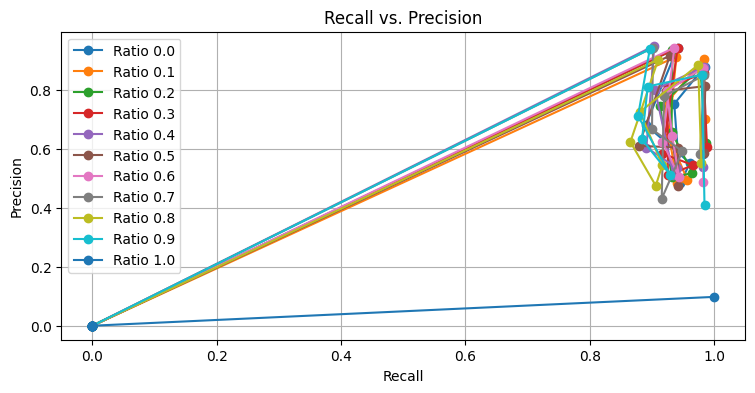

In [7]:
# Plot the recall vs. precision
plt.figure(figsize=(30, 4))
plt.subplot(1, 3, 2)
for i, ratio in enumerate(ratios):
    report = classification_reports[i]
    recall = [report[label]['recall'] for label in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']]
    precision = [report[label]['precision'] for label in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']]
    plt.plot(recall, precision, marker='o', label=f'Ratio {ratio:.1f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall vs. Precision')
plt.legend()
plt.grid(True)

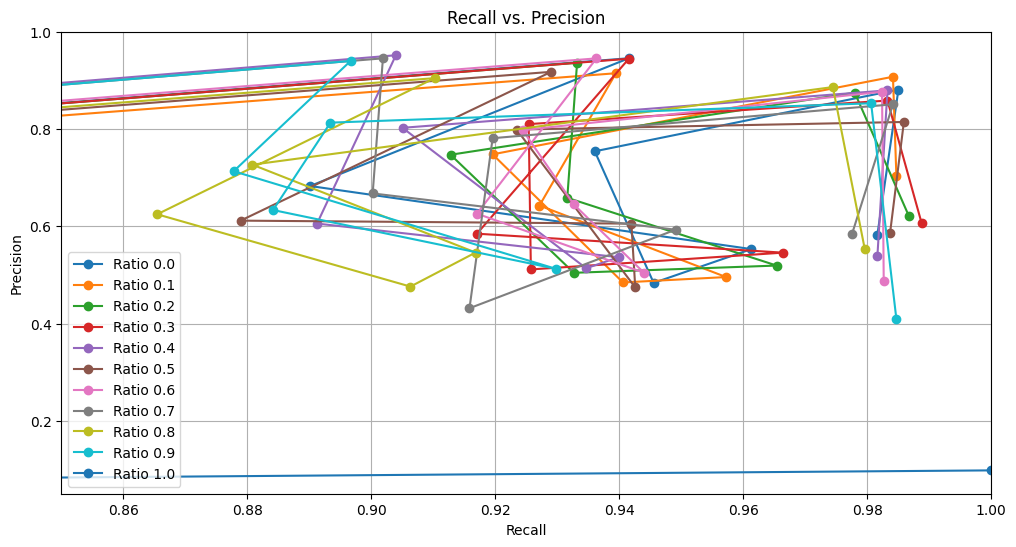

In [8]:
plt.figure(figsize=(12, 6))  # Increase the figure size (adjust as needed)

# Plot the recall vs precision
for i, ratio in enumerate(ratios):
    report = classification_reports[i]
    recall = [report[label]['recall'] for label in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']]
    precision = [report[label]['precision'] for label in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']]
    plt.plot(recall, precision, marker='o', label=f'Ratio {ratio:.1f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall vs. Precision')
plt.legend()
plt.grid(True)

plt.xlim(0.85, 1.0)  # Set x-axis limits
plt.ylim(0.05, 1.0)  # Set y-axis limits

plt.show()

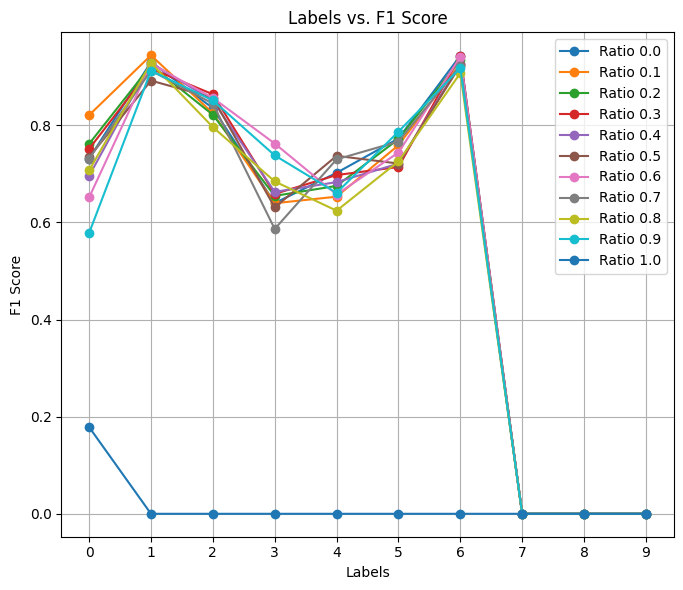

In [9]:
plt.figure(figsize=(20, 6))

# Plot the labels vs. F1 score
plt.subplot(1, 3, 3)
for i, ratio in enumerate(ratios):
    report = classification_reports[i]
    labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    f1_scores = [report[label]['f1-score'] for label in labels]
    plt.plot(labels, f1_scores, marker='o', label=f'Ratio {ratio:.1f}')
plt.xlabel('Labels')
plt.ylabel('F1 Score')
plt.title('Labels vs. F1 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()